In [1]:
!pip install -U torch torchvision torchaudio

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-vnn4afwb
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-vnn4afwb
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.2 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp31

In [1]:
!pip install pycocotools

In [2]:
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# Import Detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os

# List files and directories in My Drive
# for root, dirs, files in os.walk('/content'):
#     print("Root:", root)
#     print("Directories:", dirs)
#     print("Files:", files)
import os
print(os.listdir('/content/drive/MyDrive'))

['Colab Notebooks', 'test', 'train', 'val', 'Segmentation (3).ipynb']


In [5]:
from PIL import Image

image = Image.open("/content/drive/MyDrive/test/100.jpg")
width, height = image.size
print(width)
print(height)


2713
945


In [6]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog
# DatasetCatalog.remove("custom_train")
# DatasetCatalog.remove("custom_val")
# MetadataCatalog.remove("custom_train")
# MetadataCatalog.remove("custom_val")
# Register the dataset
register_coco_instances("custom_train", {}, "/content/drive/MyDrive/anotation_train_1.json", "/content/drive/MyDrive/train")
register_coco_instances("custom_val", {}, "/content/drive/MyDrive/anotation_val_1.json", "/content/drive/MyDrive/val")

custom_metadata = MetadataCatalog.get("custom_train")

In [7]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU found")


GPU is available: Tesla T4


In [8]:
!pip install -U detectron2

In [10]:
import detectron2
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
import os

# Create configuration object
cfg = get_cfg()

# Load a model configuration from Detectron2's model zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Load pre-trained weights for the model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Set the number of classes to 1 (for 'greenarea')
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Only one class: 'greenarea'

# Dataset registration
cfg.DATASETS.TRAIN = ("custom_train",)
cfg.DATASETS.TEST = ("custom_val",)

# Output directory for model weights and logs
cfg.OUTPUT_DIR = "./output_greenarea"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Hyperparameters
cfg.SOLVER.IMS_PER_BATCH = 2  # Batch size (2 images per batch)
cfg.SOLVER.BASE_LR = 0.00025  # Learning rate
cfg.SOLVER.MAX_ITER = 1000    # Maximum number of iterations (adjust based on your dataset)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # RoI batch size
cfg.SOLVER.STEPS = []         # Learning rate decay schedule

# Initialize trainer and start training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[09/29 18:13:25 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
model_final_f10217.pkl: 178MB [00:00, 200MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/29 18:13:26 d2.engine.train_loop]: Starting training from iteration 0


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[09/29 18:13:35 d2.utils.events]:  eta: 0:06:27  iter: 19  total_loss: 1.607  loss_cls: 0.6646  loss_box_reg: 0.195  loss_mask: 0.6827  loss_rpn_cls: 0.01876  loss_rpn_loc: 0.04877    time: 0.4043  last_time: 0.5155  data_time: 0.0571  last_data_time: 0.0478   lr: 4.9953e-06  max_mem: 4343M
[09/29 18:13:44 d2.utils.events]:  eta: 0:06:40  iter: 39  total_loss: 1.451  loss_cls: 0.5646  loss_box_reg: 0.1647  loss_mask: 0.6602  loss_rpn_cls: 0.01612  loss_rpn_loc: 0.03625    time: 0.4290  last_time: 0.3832  data_time: 0.0256  last_data_time: 0.0045   lr: 9.9902e-06  max_mem: 4343M
[09/29 18:13:52 d2.utils.events]:  eta: 0:06:14  iter: 59  total_loss: 1.298  loss_cls: 0.4103  loss_box_reg: 0.1908  loss_mask: 0.6211  loss_rpn_cls: 0.01692  loss_rpn_loc: 0.04761    time: 0.4167  last_time: 0.4590  data_time: 0.0083  last_data_time: 0.0150   lr: 1.4985e-05  max_mem: 4343M
[09/29 18:14:02 d2.utils.events]:  eta: 0:06:10  iter: 79  total_loss: 1.105  loss_cls: 0.2899  loss_box_reg: 0.1928  loss

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [12]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Initialize COCO evaluator for the validation set
evaluator = COCOEvaluator("custom_val", cfg, False, output_dir="./output_greenarea/")
val_loader = build_detection_test_loader(cfg, "custom_val")

# Run inference on validation set and evaluate
inference_on_dataset(trainer.model, val_loader, evaluator)


WARNING [09/29 18:21:48 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [09/29 18:21:48 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/29 18:21:48 d2.data.datasets.coco]: Loaded 35 images in COCO format from /content/drive/MyDrive/anotation_val_1.json
[09/29 18:21:48 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/29 18:21:48 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[09/29 18:21:48 d2.data.common]: Serializing 35 elements to byte tensors and concatenating them all ...
[09/29 18:21:48 d2.data.common]: Serialized dataset takes 0.03 MiB
[09/29 18:21:48 d2.evaluation.evaluator]: Start inference on 35 batches


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[09/29 18:21:52 d2.evaluation.evaluator]: Inference done 11/35. Dataloading: 0.0399 s/iter. Inference: 0.1092 s/iter. Eval: 0.0192 s/iter. Total: 0.1682 s/iter. ETA=0:00:04
[09/29 18:21:56 d2.evaluation.evaluator]: Total inference time: 0:00:05.583646 (0.186122 s / iter per device, on 1 devices)
[09/29 18:21:56 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.118196 s / iter per device, on 1 devices)
[09/29 18:21:56 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/29 18:21:56 d2.evaluation.coco_evaluation]: Saving results to ./output_greenarea/coco_instances_results.json
[09/29 18:21:56 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/29 18:21:56 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/29 18:21:56 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[09/29 18:21:56 d2.e

OrderedDict([('bbox',
              {'AP': 85.41869645092589,
               'AP50': 94.25742574257427,
               'AP75': 94.25742574257427,
               'APs': nan,
               'APm': nan,
               'APl': 85.41869645092589}),
             ('segm',
              {'AP': 83.16826243063868,
               'AP50': 94.25742574257427,
               'AP75': 94.25742574257427,
               'APs': nan,
               'APm': nan,
               'APl': 83.16826243063868})])

[09/29 18:46:06 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output_greenarea/model_final.pth ...
WARNING [09/29 18:46:06 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/29 18:46:06 d2.data.datasets.coco]: Loaded 35 images in COCO format from /content/drive/MyDrive/anotation_val_1.json


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

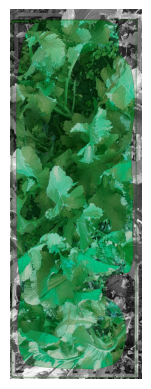

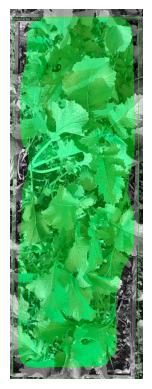

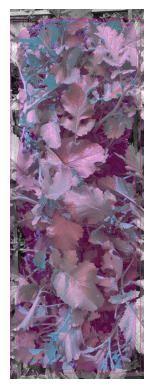

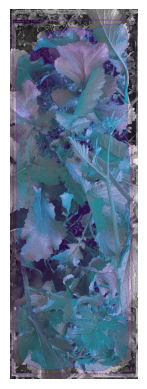

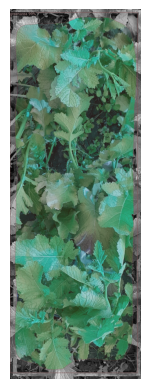

In [27]:
import random
import cv2
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.engine import DefaultPredictor
import matplotlib.pyplot as plt

# Set the trained weights for inference
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a threshold for prediction confidence
predictor = DefaultPredictor(cfg)

# Visualize random samples from the validation set
from detectron2.data import DatasetCatalog, MetadataCatalog
dataset_dicts = DatasetCatalog.get("custom_val")
metadata = MetadataCatalog.get("custom_val")

# Define custom color for 'greenarea'
green_color = [0, 255, 0]  # RGB value for green

# Detectron2 automatically remaps 0-indexed categories, so we account for that
# In this case, let's assume that Detectron2 will remap greenarea from ID 0 to 1

for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)  # Get predictions for the image

    instances = outputs["instances"].to("cpu")
    pred_classes = instances.pred_classes.numpy()

    # Create a Visualizer object
    v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.8, instance_mode=ColorMode.IMAGE_BW)

    # Ensure custom color (green) is applied to all 'greenarea' class instances
    for i, pred_class in enumerate(pred_classes):
        # Check if the predicted class corresponds to 'greenarea' (class ID 1 after remapping)
        if pred_class == 1:  # Remapped ID (1-based) for greenarea
            # Use a custom green color
            v = v.draw_instance_predictions(instances[i:i+1], assigned_colors=[green_color])
        else:
            # For other classes, we can stick to the default colors
            v = v.draw_instance_predictions(instances[i:i+1])

    # Get the final image from the Visualizer object and display it
    out = v.get_image()[:, :, ::-1]  # Get image in RGB format
    plt.imshow(out)
    plt.axis('off')  # Hide axis
    plt.show()


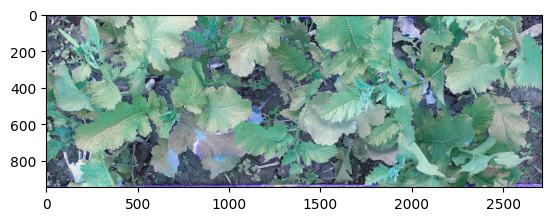

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("/content/drive/MyDrive/test/100.jpg")
#img = cv2.imread("/content/drive/MyDrive/train/images/02949652-8.1.jpg")
plt.imshow(img)
plt.show()

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Initialize COCO evaluator for the validation set
evaluator = COCOEvaluator("custom_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "custom_val")

# Run inference on validation set and evaluate
inference_on_dataset(trainer.model, val_loader, evaluator)


WARNING [09/29 14:34:06 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [09/29 14:34:07 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/29 14:34:07 d2.data.datasets.coco]: Loaded 35 images in COCO format from /content/drive/MyDrive/anotation_val_1.json
[09/29 14:34:07 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=2800, sample_style='choice')]
[09/29 14:34:07 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[09/29 14:34:07 d2.data.common]: Serializing 35 elements to byte tensors and concatenating them all ...
[09/29 14:34:07 d2.data.common]: Serialized dataset takes 0.03 MiB
[09/29 14:34:07 d2.evaluation.evaluator]: Start inference on 35 batches
[09/29 14:34:17 d2.evaluation.e

OrderedDict([('bbox',
              {'AP': 79.66185932253703,
               'AP50': 95.20125089432021,
               'AP75': 89.88898889888989,
               'APs': nan,
               'APm': nan,
               'APl': 79.66185932253703}),
             ('segm',
              {'AP': 67.54144210947149,
               'AP50': 95.20125089432021,
               'AP75': 89.88898889888989,
               'APs': nan,
               'APm': nan,
               'APl': 67.54144210947149})])

[09/29 14:37:31 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

WARNING [09/29 14:37:31 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/29 14:37:31 d2.data.datasets.coco]: Loaded 35 images in COCO format from /content/drive/MyDrive/anotation_val_1.json


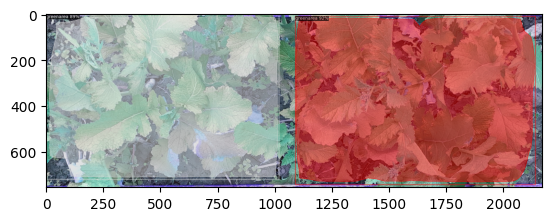

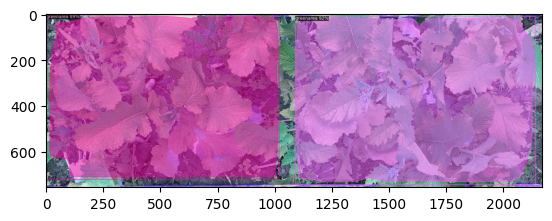

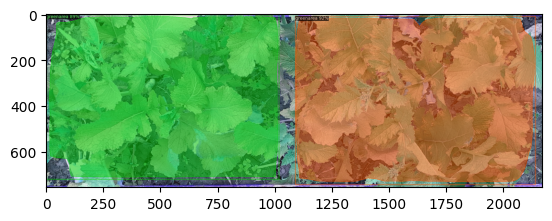

In [ ]:
import random
import cv2
from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultPredictor
import matplotlib.pyplot as plt

# Set the trained weights for inference
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a threshold for prediction confidence
predictor = DefaultPredictor(cfg)

# Visualize random samples from the validation set
from detectron2.data import DatasetCatalog, MetadataCatalog
dataset_dicts = DatasetCatalog.get("custom_val")
metadata = MetadataCatalog.get("custom_val")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread("/content/drive/MyDrive/test/100.jpg")
    outputs = predictor(img)  # Get predictions for the image
    v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.8)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.show()


[09/29 11:10:50 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


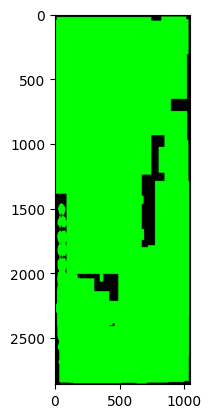

In [ ]:
import cv2
import numpy as np
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Load the image
#img = cv2.imread("/content/drive/MyDrive/test/100.jpg")
img = cv2.imread("/content/drive/MyDrive/train/images/02949652-8.1.jpg")
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

# Create a predictor object
predictor = DefaultPredictor(cfg)
# Run inference to get the outputs
# Run inference to get the outputs
outputs = predictor(img)

# Create a blank image for the segmented objects
segmented_image = np.zeros_like(img)

# Loop through each instance and overlay the masks
for i in range(len(outputs["instances"])):
    mask = outputs["instances"].pred_masks[i].cpu().numpy()  # Get the mask
    # Color the segmented object (e.g., green)
    segmented_image[mask] = [0, 255, 0]  # Set the segmented area to green

# Optional: Combine with original image to visualize the segmentation
combined_image = cv2.addWeighted(img, 0.5, segmented_image, 0.5, 0)

# Display the segmented objects only
plt.imshow(segmented_image)
plt.show()


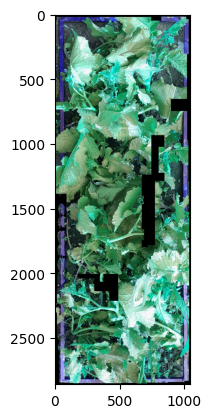

In [ ]:
import cv2
import numpy as np
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Load the image
#img = cv2.imread("/content/drive/MyDrive/test/100.jpg")
img = cv2.imread("/content/drive/MyDrive/train/images/02949652-8.1.jpg")
# Run inference to get the outputs
outputs = predictor(img)

# Create a mask to store the segmented objects
mask_image = np.zeros_like(img)

# Loop through each instance to overlay the masks
for i in range(len(outputs["instances"])):
    mask = outputs["instances"].pred_masks[i].cpu().numpy()  # Get the mask
    # Apply the mask to the original image
    mask_image[mask] = img[mask]  # Retain the original image pixels where the mask is True

# Display the result: original image with segmented objects
plt.imshow(mask_image)
plt.show()


[09/29 11:12:10 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


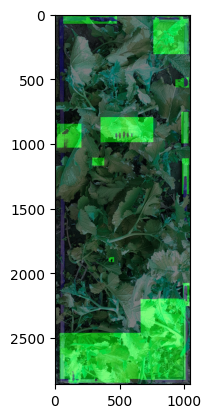

In [ ]:
# Load the image
#img = cv2.imread("/content/drive/MyDrive/test/100.jpg")
img = cv2.imread("/content/drive/MyDrive/train/images/02949652-8.1.jpg")
# Get configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

# Create a predictor object
predictor = DefaultPredictor(cfg)
# Run inference to get the outputs
outputs = predictor(img)

# Create a blank image to overlay the masks
mask_image = np.zeros_like(img)

# Loop through each instance to overlay the masks
for i in range(len(outputs["instances"])):
    mask = outputs["instances"].pred_masks[i].cpu().numpy()
    # Convert mask to uint8 format
    mask_colored = np.zeros_like(img)
    mask_colored[mask] = [0, 255, 0]  # Color the mask green (BGR format)

    # Combine the mask with the mask_image
    mask_image = cv2.add(mask_image, mask_colored)

# Show the original image with masks overlayed
combined_image = cv2.addWeighted(img, 0.5, mask_image, 0.5, 0)

# Display the result
plt.imshow(combined_image)
plt.show()


[09/29 11:16:57 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


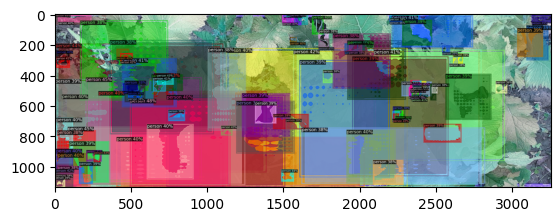

In [ ]:
img = cv2.imread("/content/drive/MyDrive/test/100.jpg")
# Get configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

# Create a predictor object
predictor = DefaultPredictor(cfg)
outputs = predictor(img)

# Create a Visualizer instance with your desired settings
v = Visualizer(img[:, :, ::-1],
               MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
               scale=1.2)

# Access instances using `len` and indexing
instances = outputs["instances"]
for i in range(len(instances)):
    instance = instances[i]
    # Extract bounding box and mask
    box = instance.pred_boxes.tensor.cpu().numpy()
    color = (255, 0, 0)  # Change to red (BGR format)
    thickness = 2        # Change thickness of the box

    # Draw the bounding box manually (if needed)
    for b in box:
        cv2.rectangle(img,
                      (int(b[0]), int(b[1])),
                      (int(b[2]), int(b[3])),
                      color,
                      thickness)

# Optionally, draw instance predictions using Visualizer
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image()[:, :, ::-1])
plt.show()

[09/22 13:22:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/22 13:22:13 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


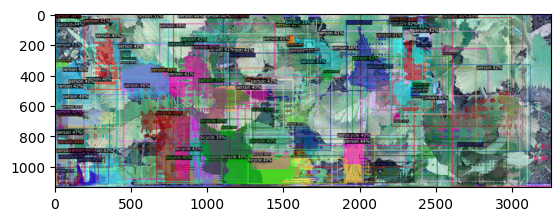

In [ ]:
# Load the trained model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# Get configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

# Create a predictor object
predictor = DefaultPredictor(cfg)
predictor = DefaultPredictor(cfg)

# Make predictions
im = cv2.imread("/content/drive/MyDrive/test/100.jpg")
outputs = predictor(im)

# Visualize the results
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()


In [ ]:
import os

file_path = '/content/sample_data/train/images\\8f52a469-IMG_20231221_160202.jpg'
print(os.path.exists(file_path))


False


In [ ]:
#Green: Represents the predicted masks for the detected objects. This is often used to fill the area where the model predicts an object is present.
#Blue: Used for drawing bounding boxes or contour lines around detected objects. It might also be used to indicate class-specific boundaries or highlight different classes.**bold text**
#Violet Overlays: The areas that are annotated as objects in the dataset. This shows what the ground truth labels are, allowing you to compare them with the model’s predictions.